In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [4]:
df.shape

(10000, 14)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.duplicated().sum()

0

In [12]:
 df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [11]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [13]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [14]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis='columns',inplace=True)

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df = pd.get_dummies(df,['Geography','Gender'],drop_first=True)

In [18]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [23]:
df = df.replace({False: 0, True: 1}).infer_objects(copy=False)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [25]:
X= df.drop(columns=['Exited'])
y= df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
X_train.shape

(8000, 11)

In [30]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)   # learns + scales train
X_test_scaled = scaler.transform(X_test)         # scales test using train params

In [31]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2025-08-27 06:52:23.596183: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756277543.805568      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756277543.871049      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [56]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim = 11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [59]:
history = model.fit(X_train_scaled,y_train,epochs=50,validation_split =0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5279 - loss: 0.7680 - val_accuracy: 0.7981 - val_loss: 0.5197
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8017 - loss: 0.4952 - val_accuracy: 0.8000 - val_loss: 0.4594
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7968 - loss: 0.4682 - val_accuracy: 0.8131 - val_loss: 0.4296
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8059 - loss: 0.4370 - val_accuracy: 0.8238 - val_loss: 0.4160
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8057 - loss: 0.4376 - val_accuracy: 0.8231 - val_loss: 0.4102
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8082 - loss: 0.4324 - val_accuracy: 0.8256 - val_loss: 0.4075
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8154 - loss: 0.4198 - val_accuracy: 0.8263 - val_loss: 0.4040
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8096 - loss: 0.4228 - val_accuracy: 0.

In [60]:
model.layers[0].get_weights()

[array([[-1.0970315e-02, -9.3713425e-02,  3.2143954e-02, -4.2214054e-01,
         -5.6475874e-02,  2.7385113e-01,  5.3404205e-02, -2.2060831e-01,
         -1.1272664e-02,  2.5004935e-01, -7.3966600e-02],
        [-6.7786252e-01, -6.5277892e-01, -7.4476773e-01, -4.4790378e-01,
         -2.1096133e-02, -6.8968695e-01,  5.3139865e-01,  1.7039418e-01,
          1.8213303e-01,  2.5531757e-01,  8.8074034e-01],
        [-1.9999791e-03, -4.0342320e-02, -1.3767733e-01, -1.2403204e-02,
         -5.6916852e-02, -3.4102774e-01,  2.6745599e-02, -4.1655678e-02,
          1.6294399e-01, -1.7050350e-02,  2.3393281e-01],
        [-1.8347794e-02, -1.5744549e-01, -6.0240965e-02, -2.1100473e-02,
          1.9896342e-01, -9.4597444e-02, -8.7094754e-02, -7.3385745e-01,
          2.5255096e-01,  4.7671637e-01, -2.4727979e-01],
        [ 4.6439141e-02,  3.6694610e-03, -7.6250709e-03,  5.5800825e-01,
          1.1367874e+00,  7.5942285e-02,  3.9126059e-01, -8.6217386e-01,
          8.0995953e-01,  2.4726981e-0

In [61]:
model.layers[1].get_weights()

[array([[ 0.8136012 ,  0.49196184, -0.47052142,  0.41274202, -0.84837896,
         -0.3665887 ,  0.27841547, -0.6524872 ,  0.53943163,  0.5311683 ,
         -0.41963792],
        [-0.02474994, -0.3265354 , -0.48701537,  0.17439261,  0.15704297,
         -0.4112988 ,  0.19129261,  0.37698627,  0.64484876,  0.24025144,
         -0.29395244],
        [ 0.3433564 ,  0.18312272, -0.321607  ,  0.2636116 , -0.07942352,
         -0.5993576 , -0.21758479,  0.2683651 ,  0.8322167 ,  0.32947463,
          0.082361  ],
        [ 0.26077032, -0.49030313,  0.02387561,  0.5082216 ,  0.18199383,
          0.1093813 , -0.48848468,  0.35123354,  0.39940286, -0.2398546 ,
          0.24700853],
        [ 0.2947875 , -0.8384343 ,  0.4053995 , -0.23248029,  0.89305365,
          0.1343373 , -1.4427552 ,  0.8535595 , -0.42814928, -0.31750235,
          0.4584313 ],
        [ 0.02301124,  0.22966157, -0.25152263, -0.10255035,  0.32722166,
         -0.30259392, -0.12916973,  0.19804962,  0.06735728,  0.5718639

In [62]:
y_log = model.predict(X_test_scaled)
y_log

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


array([[0.04521128],
       [0.01468293],
       [0.07680918],
       ...,
       [0.774039  ],
       [0.13799095],
       [0.20148753]], dtype=float32)

In [64]:
y_pred = np.where(y_log>0.5,1,0)

In [65]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [66]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.8585

In [68]:
history.history

{'accuracy': [0.6685937643051147,
  0.7943750023841858,
  0.800000011920929,
  0.8053125143051147,
  0.8098437786102295,
  0.8120312690734863,
  0.8154687285423279,
  0.8149999976158142,
  0.8220312595367432,
  0.8253124952316284,
  0.8259375095367432,
  0.8334375023841858,
  0.83984375,
  0.8451562523841858,
  0.8493750095367432,
  0.8540624976158142,
  0.8556249737739563,
  0.8568750023841858,
  0.8564062714576721,
  0.8589062690734863,
  0.859375,
  0.8595312237739563,
  0.8582812547683716,
  0.8600000143051147,
  0.8595312237739563,
  0.8612499833106995,
  0.8610937595367432,
  0.8612499833106995,
  0.8635937571525574,
  0.8612499833106995,
  0.8603125214576721,
  0.8623437285423279,
  0.8646875023841858,
  0.8628125190734863,
  0.8614062666893005,
  0.8618749976158142,
  0.8653125166893005,
  0.86328125,
  0.8659374713897705,
  0.864062488079071,
  0.8643749952316284,
  0.8653125166893005,
  0.8637499809265137,
  0.8645312786102295,
  0.8660937547683716,
  0.866406261920929,
  0.8

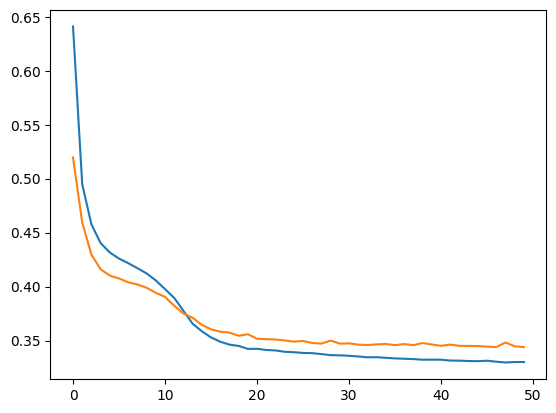

In [71]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

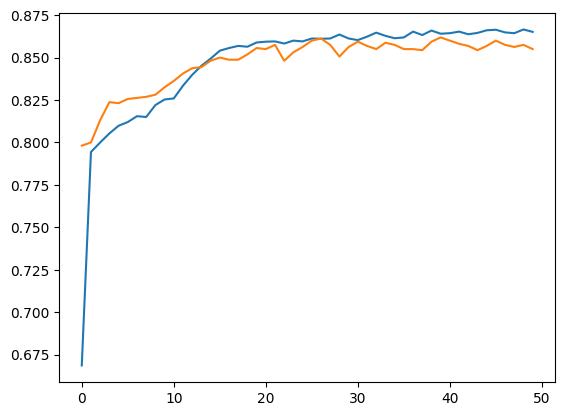

In [72]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])